a full profile of the ideal terrorist - from year 2006 (its when the second intifad ended and when hamas captured gaza - this is in my opinion the closest to today)
so far - 
1. most likely a single terrorist unrelated to any terror organization/unknown
2. most likely explosives
3. seems like the majority of the terror attacks happen in west bank
4. seems like the majority of terror attacks are single terrorists

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import csv_loader as loader
terrorism = loader.get_csv_file('terrorism')
pd.set_option('display.max_columns', None)


C:\Users\user\AppData\Local\Temp\ipykernel_16052\3971078776.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\user\OneDrive\Desktop\analyst_project\Project\csv_loader.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['approxdate'] = pd.to_datetime(dict(year=dataframe['iyear'], month=dataframe['imonth'], day=dataframe['iday']))
c:\Users

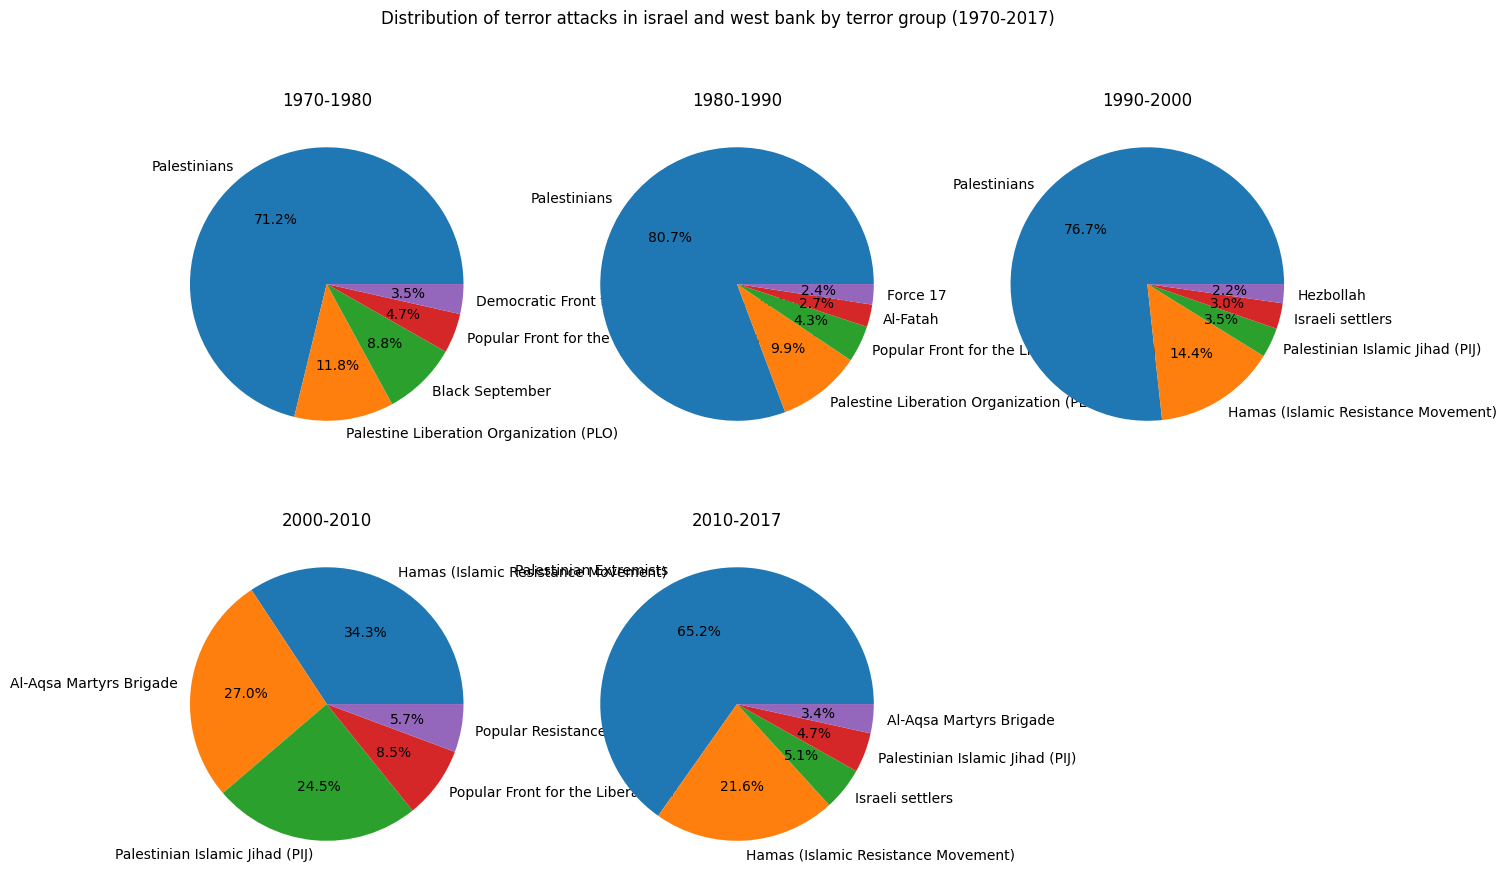

In [2]:
year_slices = [(1970, 1980), (1980, 1990), (1990, 2000), (2000, 2010), (2010, 2017)]
plt.figure(figsize=(15,10))


israel = terrorism[
        (terrorism['country_txt'].isin(['West Bank and Gaza Strip', 'Israel'])) & 
        (terrorism['gname'] != 'Unknown') & 
        (terrorism['gname'] == terrorism['gname'].replace({'Israeli extremists': 'Israeli settlers','Jewish Extremists' : 'Israeli settlers'}))
    ]

legend_labels = []

for i, period in enumerate(year_slices, start=1):
    start_year, end_year = period
    current_period_data = israel[(israel['iyear'] >= start_year) & (israel['iyear'] < end_year)].copy()
    terror_group = current_period_data.groupby('gname').size().reset_index(name='count').sort_values(by='count',ascending=False).head()

    plt.subplot(2,3,i)

    plt.pie(terror_group['count'],autopct='%1.1f%%', labels=terror_group['gname'])

    plt.title(f'{start_year}-{end_year}')
plt.suptitle('Distribution of terror attacks in israel and west bank by terror group (1970-2017)')
plt.show()

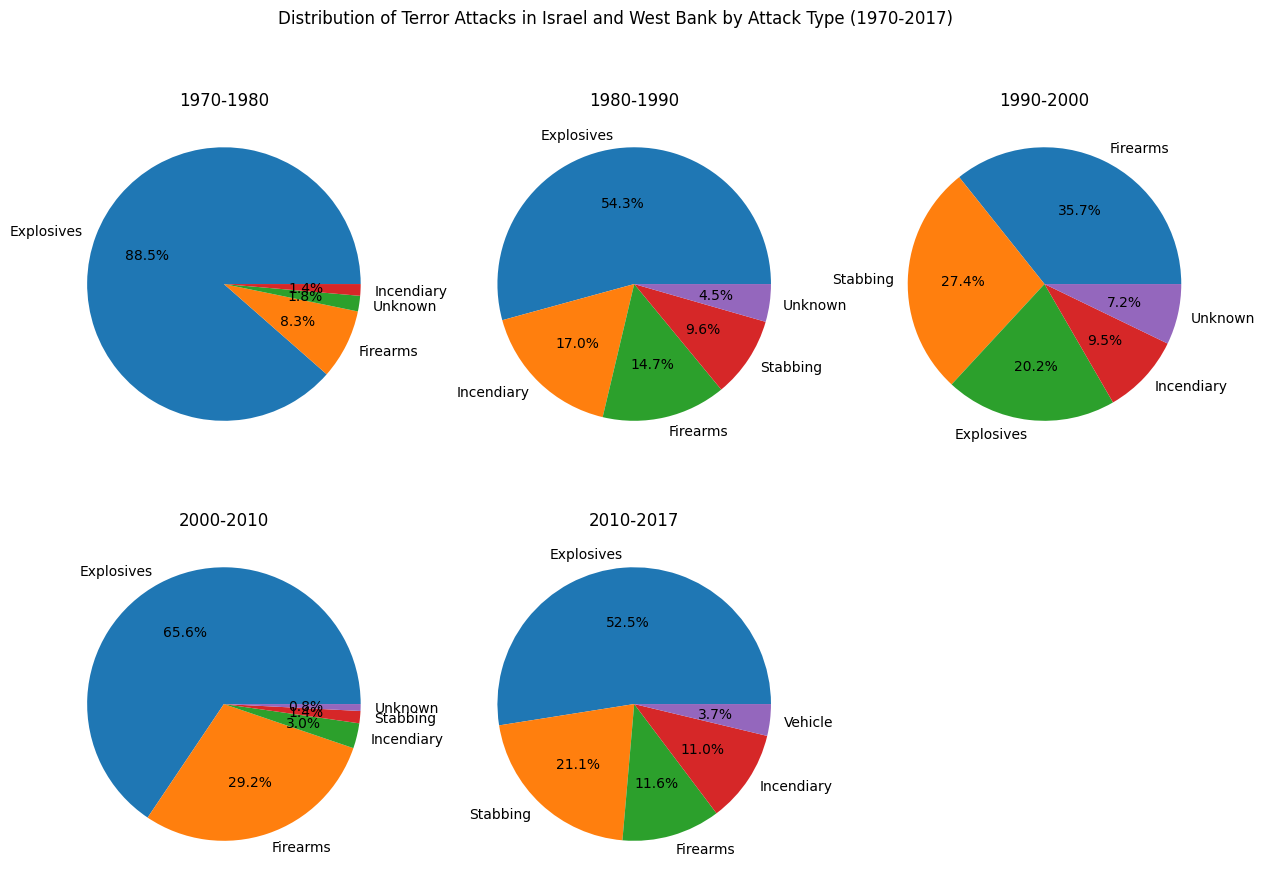

In [3]:
periods = [(1970, 1980), (1980, 1990), (1990, 2000), (2000, 2010), (2010, 2017)]

plt.figure(figsize=(15, 10))

israel = terrorism[(terrorism['country_txt'].isin(['West Bank and Gaza Strip', 'Israel']))]
legend_labels = []  

for i, period in enumerate(periods, start=1):
    start_year, end_year = period
    
    current_period_data = israel[(israel['iyear'] >= start_year) & (israel['iyear'] < end_year)].copy()
    attack_type_period = current_period_data.groupby('weaptype1_txt').size().reset_index(name='count').sort_values(by='count', ascending=False).head()
    attack_type_period['weaptype1_txt'] = attack_type_period['weaptype1_txt'].replace({'Melee': 'Stabbing', 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)': 'Vehicle'})
    labels = attack_type_period['weaptype1_txt']
    plt.subplot(2, 3, i)
    
    plt.pie(attack_type_period['count'], autopct='%1.1f%%', labels=labels)
    
    plt.title(f'{start_year}-{end_year}')
    
plt.suptitle('Distribution of Terror Attacks in Israel and West Bank by Attack Type (1970-2017)')
plt.show()


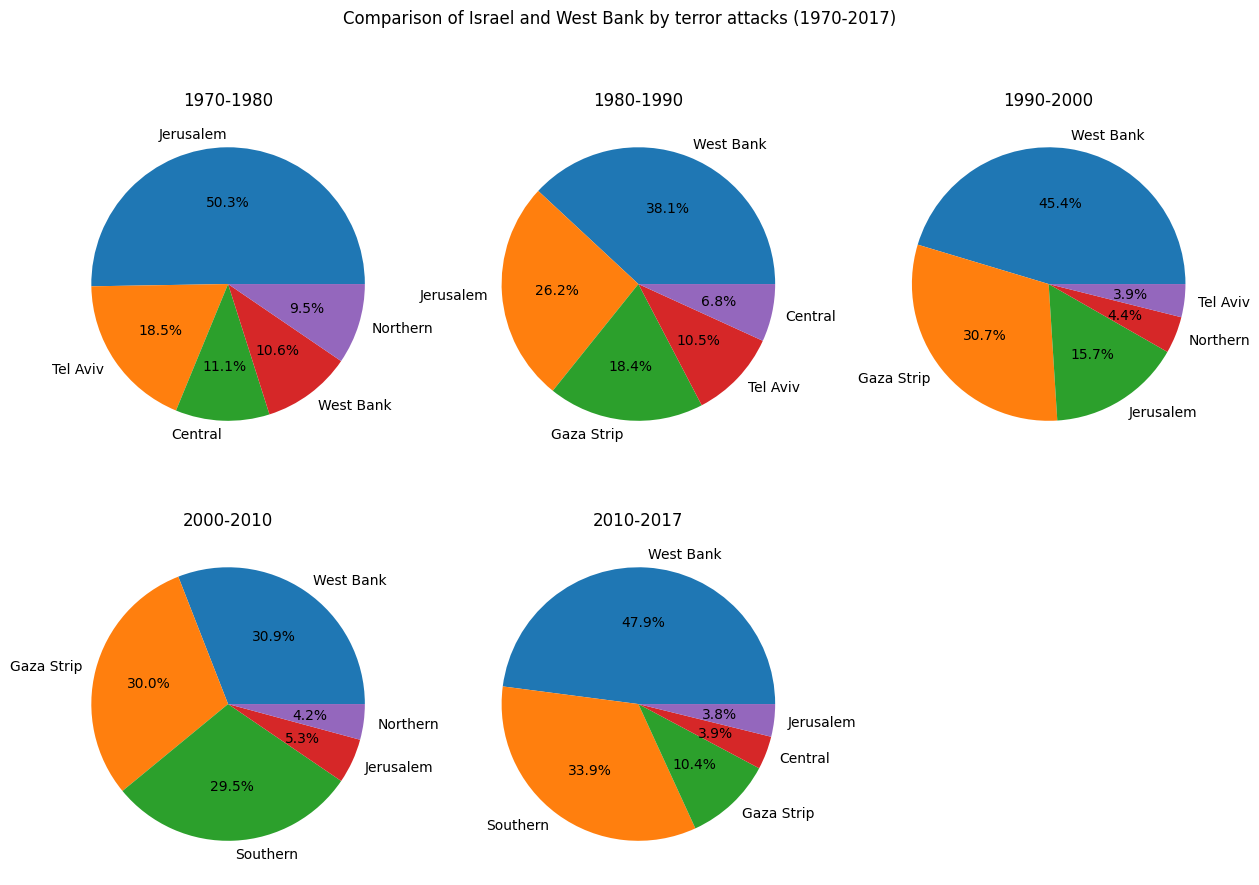

In [4]:
periods = [(1970, 1980), (1980, 1990), (1990, 2000), (2000, 2010), (2010, 2017)]

plt.figure(figsize=(15, 10))

israel = terrorism[(terrorism['country_txt'].isin(['West Bank and Gaza Strip', 'Israel'])) & (terrorism['provstate'] != 'Unknown')]
legend_labels = []  

for i, period in enumerate(periods, start=1):
    start_year, end_year = period
    current_period_data = israel[(israel['iyear'] >= start_year) & (israel['iyear'] < end_year)].copy()
    provstate = current_period_data.groupby('provstate').size().reset_index(name='count').sort_values(by='count', ascending=False).head()
    labels = provstate['provstate']
    plt.subplot(2, 3, i)
    
    plt.pie(provstate['count'], autopct='%1.1f%%', labels=labels)
    
    plt.title(f'{start_year}-{end_year}')
    
plt.suptitle('Comparison of Israel and West Bank by terror attacks (1970-2017)')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16052\2954174564.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nperps['terrorist_category'] = nperps['nperps'].apply(categorize_terrorists)


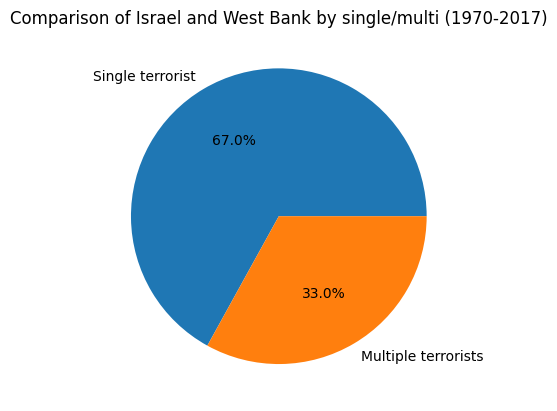

In [5]:
import numpy as np
import matplotlib.pyplot as plt

nperps = terrorism[(terrorism['country_txt'].isin(['West Bank and Gaza Strip', 'Israel']))]

def categorize_terrorists(value):
    if value == 1:
        return 'Single terrorist'
    elif value > 1:
        return 'Multiple terrorists'
    else:
        return 'Unknown'

nperps['terrorist_category'] = nperps['nperps'].apply(categorize_terrorists)

nperps = nperps[(nperps['terrorist_category'] != 'Unknown')]

nperps_counts = nperps.groupby('terrorist_category').size().reset_index(name='count').sort_values(by='count', ascending=False).head()

plt.pie(nperps_counts['count'], autopct='%1.1f%%', labels=nperps_counts['terrorist_category'])
plt.title(f'Comparison of Israel and West Bank by single/multi (1970-2017)')

plt.show()


In [7]:
israel_db_subtype = terrorism[(terrorism['country_txt'].isin(['West Bank and Gaza Strip', 'Israel']))]

def categorize_terrorists(value):
    if value == 1:
        return 'Single terrorist'
    elif value > 1:
        return 'Multiple terrorists'
    else:
        return 'Unknown'

israel_db_subtype['terrorist_category'] = israel_db_subtype['nperps'].apply(categorize_terrorists)


#israel_db_subtype.to_csv(r"C:\Users\user\OneDrive\Desktop\analyst_project\databases_to_powerbi\israel_db_subtype.csv", index=False)

C:\Users\user\AppData\Local\Temp\ipykernel_16052\111728811.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  israel_db_subtype['terrorist_category'] = israel_db_subtype['nperps'].apply(categorize_terrorists)


In [13]:
df = israel_db_subtype

# Update weapsubtype1_txt based on weaptype1_txt
df['weapsubtype1_txt'] = df.apply(
    lambda row: row['weaptype1_txt'] if row['weaptype1_txt'] != 'Explosives' else row['weapsubtype1_txt'],
    axis=1
)

df.to_csv(r"C:\Users\user\OneDrive\Desktop\analyst_project\databases_to_powerbi\new_israel.csv", index=False)

C:\Users\user\AppData\Local\Temp\ipykernel_16052\2289802120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weapsubtype1_txt'] = df.apply(


In [15]:
df.groupby('weapsubtype1_txt').size()

weapsubtype1_txt
Biological                                                                       1
Chemical                                                                        11
Firearms                                                                       953
Grenade                                                                         85
Incendiary                                                                     400
Landmine                                                                        12
Letter Bomb                                                                     17
Melee                                                                          641
Other                                                                            4
Other Explosive Type                                                            37
Pipe Bomb                                                                       49
Pressure Trigger                                                      